In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/sarayu.madakasira/Downloads/data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.drop(['country'], axis=1, inplace=True)

In [4]:
def min_max_scaling(data, feature_range=(0, 1)):
    data_min = np.min(data, axis=0)  
    data_max = np.max(data, axis=0)  
    scale_min, scale_max = feature_range
    
    scaled_data = (data - data_min) / (data_max - data_min) * (scale_max - scale_min) + scale_min
    
    return scaled_data
    
df = min_max_scaling(df, feature_range=(0, 1))
print("Scaled Data:\n", df)

Scaled Data:
      child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  

In [5]:
df = df.to_numpy()

In [6]:
class HierarchicalClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def fit(self, data):
        self.data = data
        self.n_samples = data.shape[0]
        
        self.distances = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(i, self.n_samples):
                self.distances[i, j] = self.distances[j, i] = np.linalg.norm(data[i] - data[j])
        
        self.clusters = [[i] for i in range(self.n_samples)]
        
        while len(self.clusters) > self.n_clusters:
            min_dist = np.inf
            cluster_to_merge = (None, None)
            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    dist = self.calculate_cluster_distance(self.clusters[i], self.clusters[j])
                    if dist < min_dist:
                        min_dist = dist
                        cluster_to_merge = (i, j)

            cluster_i, cluster_j = cluster_to_merge
            self.clusters[cluster_i] = self.clusters[cluster_i] + self.clusters[cluster_j]
            del self.clusters[cluster_j]

        self.labels = np.zeros(self.n_samples)
        for label, cluster in enumerate(self.clusters):
            for idx in cluster:
                self.labels[idx] = label


    def calculate_cluster_distance(self, cluster_i, cluster_j):
        min_distance = np.inf
        for i in cluster_i:
            for j in cluster_j:
                distance = self.distances[i, j]
                if distance < min_distance:
                    min_distance = distance
        return min_distance

    def predict(self):
        return self.clusters
                            
hc = HierarchicalClustering(n_clusters=3)
hc.fit(df)
clusters = hc.predict()

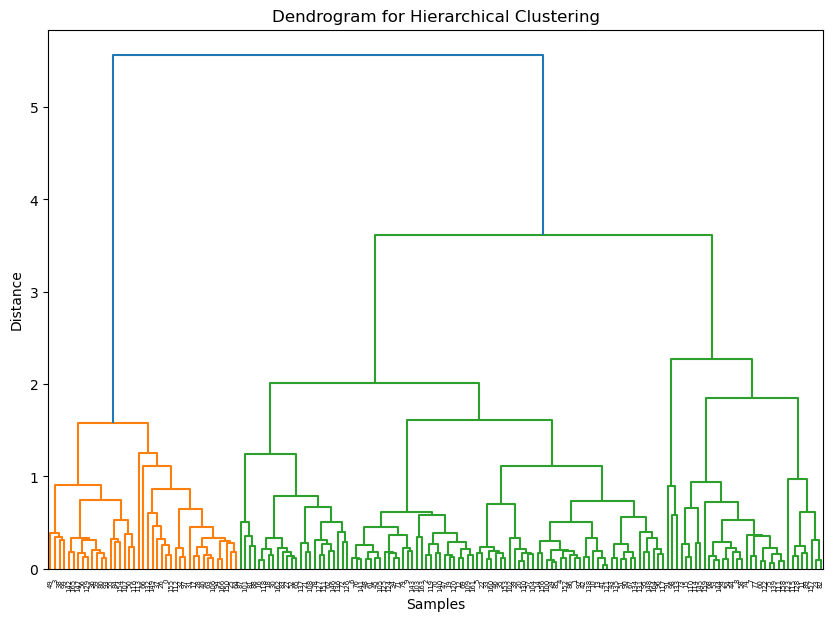

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
class HierarchicalClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def fit(self, data):
        self.data = data
        self.linkage_matrix = linkage(self.data, method='ward') 

    def plot_dendrogram(self):
        plt.figure(figsize=(10, 7))
        dendrogram(self.linkage_matrix)
        plt.title("Dendrogram for Hierarchical Clustering")
        plt.xlabel("Samples")
        plt.ylabel("Distance")
        plt.show()
        
hc = HierarchicalClustering(n_clusters=3)
hc.fit(df) 
hc.plot_dendrogram()

Cluster assignments: [1 2 2 1 2 2 2 3 3 2 2 3 2 2 2 3 2 1 2 2 2 2 2 3 2 1 1 2 1 3 2 1 1 2 2 2 1
 1 1 2 1 2 2 2 3 2 2 2 2 1 1 2 2 3 3 1 1 2 3 1 3 2 2 1 1 2 1 2 3 2 2 2 2 3
 3 3 2 3 2 2 1 2 3 2 1 2 2 2 2 3 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 1 2 2 3
 3 1 1 3 3 1 2 2 2 2 2 3 3 2 2 2 2 3 1 2 2 1 3 2 2 2 2 2 3 2 2 1 2 3 3 2 1
 2 1 1 2 2 2 1 1 2 3 3 3 2 2 2 2 2 1 1]


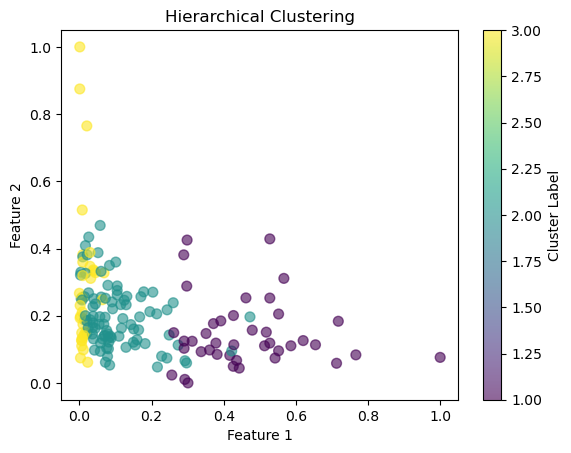

In [8]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(df, method='ward')
n_clusters = 3
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

print("Cluster assignments:", clusters)

plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

df_new = pd.DataFrame(df, columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
df_new['Cluster_Labels'] = clusters

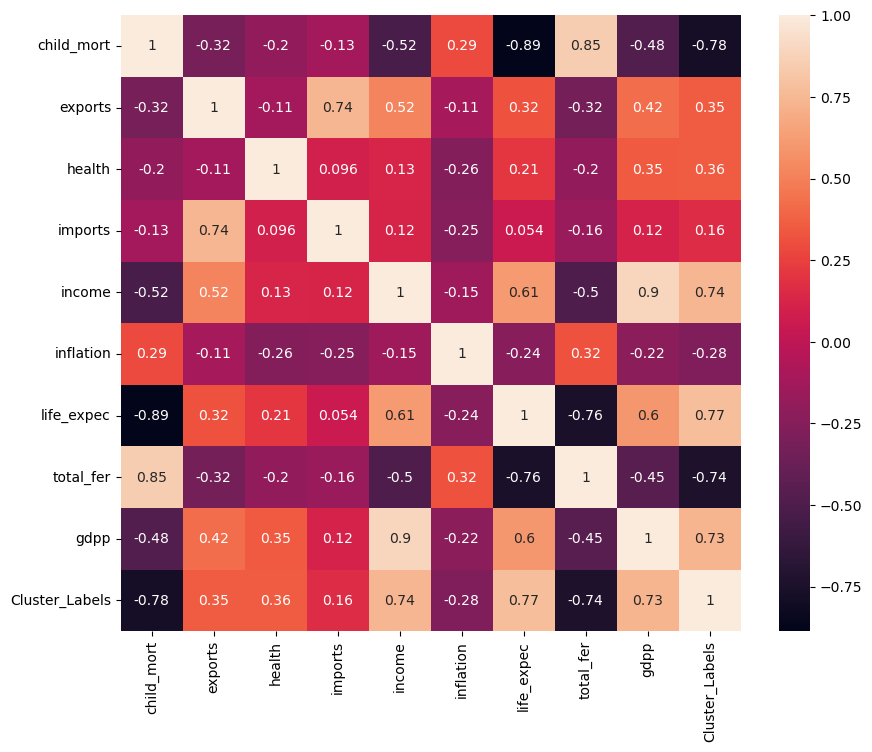

In [9]:
corr_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
y = df_new['Cluster_Labels']
x = df_new.drop(['Cluster_Labels'], axis=1)
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [16]:
ratio = 0.75
total_rows = df_new.shape[0]
train_size = int(total_rows*ratio)
x_train = x[0:train_size]
x_test = x[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

In [18]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [20]:
from collections import Counter
from math import sqrt

def euclidean_distance(point1, point2):
    return sqrt(np.sum((point1 - point2) ** 2))

class KNN:
    def __init__(self, k=2):
        self.k = k 

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
        
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [22]:
knn = KNN(k=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
print("-----")
print(y_test)

[2 2 2 3 1 2 2 1 3 2 2 2 2 2 3 2 2 1 2 3 3 2 1 2 1 1 2 2 2 2 1 2 3 3 3 2 2
 2 2 2 1 1]
-----
[2 2 2 3 1 2 2 1 3 2 2 2 2 2 3 2 2 1 2 3 3 2 1 2 1 1 2 2 2 1 1 2 3 3 3 2 2
 2 2 2 1 1]


In [24]:
from collections import Counter
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred, positive_class):
    tp = np.sum((y_pred == positive_class) & (y_true == positive_class))
    fp = np.sum((y_pred == positive_class) & (y_true != positive_class))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(y_true, y_pred, positive_class):
    tp = np.sum((y_pred == positive_class) & (y_true == positive_class))
    fn = np.sum((y_pred != positive_class) & (y_true == positive_class))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

In [26]:
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred, positive_class=1)
rec = recall(y_test, y_pred, positive_class=1)
f1 = f1_score(prec, rec)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9762
Precision: 1.0000
Recall: 0.9000
F1 Score: 0.9474


In [28]:
def silhouette_score_optimized(X, labels):
    unique_labels = np.unique(labels)
    n_samples = X.shape[0]
    silhouette_scores = []

    for i in range(n_samples):
       
        same_cluster = X[labels == labels[i]]
        a_i = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))

       
        b_i = np.inf
        for label in unique_labels:
            if label != labels[i]:
                other_cluster = X[labels == label]
                b_i = min(b_i, np.mean(np.linalg.norm(other_cluster - X[i], axis=1)))

       
        silhouette_scores.append((b_i - a_i) / max(a_i, b_i))

    return np.mean(silhouette_scores)

sil_score = silhouette_score_optimized(df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3285
